In [23]:
import pandas as pd
from pandas.stats.api import ols

import statsmodels.formula.api as sm
import statsmodels.formula.api as smf

import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

import patsy

import seaborn as sns
from seaborn import plt

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.grid_search import GridSearchCV

import csv
import datetime
import dateutil.parser
from pprint import pprint

from glob import glob

# Exercise 2.1

Plot domestic total gross over time.

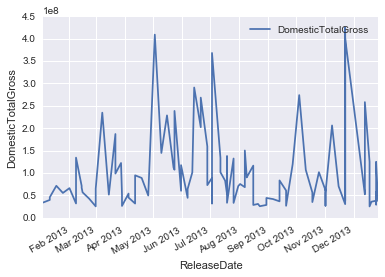

In [24]:
#import 2013_movies.csv from import pandas as pd

movies_df = pd.read_csv('/Users/danvigil/ds/metis/metisgh/sf16_ds4/challenges/02-pandas/2013_movies.csv')        
movies_df['ReleaseDate'] = movies_df.ReleaseDate.apply(dateutil.parser.parse)        
#print(len(movies_df))
#movies_df.sample(10)

movies_df.plot('ReleaseDate','DomesticTotalGross')
plt.xlabel('ReleaseDate')
plt.ylabel('DomesticTotalGross')
plt.show()

# Exercise 2.2

Plot runtime vs. domestic total gross.

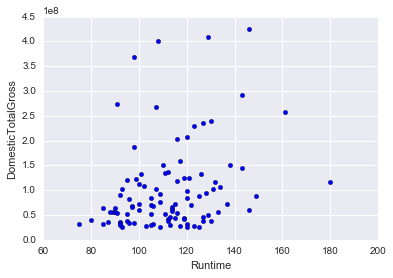

In [25]:
x = movies_df['Runtime']
y = movies_df['DomesticTotalGross']
plt.scatter(x, y)
plt.xlabel('Runtime')
plt.ylabel('DomesticTotalGross')
plt.show()

# Exercise 2.3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [5]:
movies_df.groupby('Rating').mean()

,Budget,DomesticTotalGross,Runtime
Rating,,,
G,NaN,2.684928e+08,107.000000
PG,9.393333e+07,1.311357e+08,99.933333
PG-13,9.660976e+07,1.114498e+08,117.510638
R,3.886364e+07,6.989243e+07,110.729730


# Exercise 2.4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

/Users/danvigil/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


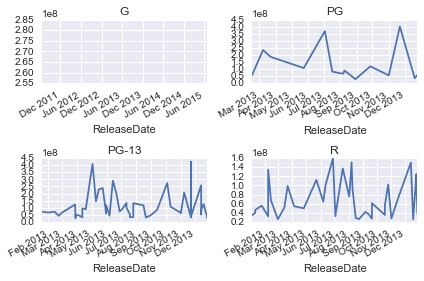

In [26]:
# couldn't make this script:
#movies_df[['Rating','ReleaseDate','DomesticTotalGross']].groupby('Rating').plot('ReleaseDate','DomesticTotalGross', subplots=True)
# incorporate subplots so I googled this style off of StackOverflow:

f, axList = plt.subplots(2,2)
for ax, (rating,dat) in zip(axList.flatten(), movies_df.groupby('Rating')):
    dat.plot('ReleaseDate','DomesticTotalGross', ax=ax, legend=False)
    ax.set_title(rating)
    plt.tight_layout()

# Exercise 2.5

What director in your dataset has the highest gross per movie?

In [7]:
director = movies_df['Director'][movies_df['DomesticTotalGross'].idxmax()]
director

'Francis Lawrence'

# Exercise 2.6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

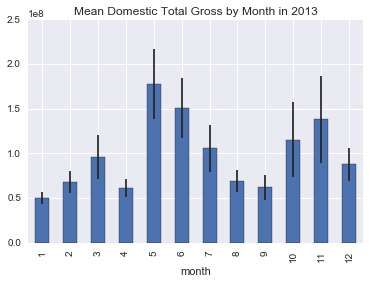

In [44]:
#convert to datetime
movies_df['ReleaseDate'] = pd.to_datetime(movies_df['ReleaseDate'])

#strip month out and assign it its numeric value
movies_df['month'] = movies_df['ReleaseDate'].dt.month
movies_df['month'] = movies_df['ReleaseDate'].apply(lambda x: x.month)

dtg_month = movies_df.groupby(by=['month'])['DomesticTotalGross'].mean()

df2 = movies_df.groupby([pd.Grouper(key='ReleaseDate', freq='M'),]).aggregate(['count', 'std'])
df2 = df2.DomesticTotalGross.reset_index()
df2['SEM'] = df2['std']/df2['count']**0.5  #correct formula for std to the mean
df2.index += 1 #correct for variance between month & SEM index

ax2 = dtg_month.plot(kind='bar', title='Mean Domestic Total Gross by Month in 2013', yerr=df2.SEM)
#error bars seem reasonable compared to regular STD